In [1]:
import pandas as pd
import pickle
import plotly.express as px

In [2]:
path_folder = '/home/BS94_SUR/phD/review/datasets/patterns identification perturbation'

In [9]:
drug ='Navitoclax'
dataset_name = f'{drug}.csv'
dataset_meta = f'{drug}_cell_anno.csv'

In [10]:
dataset = pd.read_csv(path_folder + '/' + dataset_name)
dataset_meta = pd.read_csv(path_folder + '/' + dataset_meta)

In [11]:
print(f"Nb of cells: {len(dataset['Unnamed: 0'].unique())}")
print(f"Nb of genes: {len(dataset.columns.unique())}")

Nb of cells: 14507
Nb of genes: 5001


In [12]:
dataset = dataset.rename(columns={'Unnamed: 0': 'barcode'})
dataset_merged = pd.merge(dataset, dataset_meta, on='barcode', how='inner')
dataset_merged

barcode  RP11-206L10.4  RP11-54O7.3    SAMD11      HES4  \
0      AAACCTGAGAGCAATT-1-0            0.0          0.0  0.000000  1.140126   
1      AAACCTGAGATCTGAA-1-0            0.0          0.0  0.000000  2.115410   
2      AAACCTGCACCAGATT-1-0            0.0          0.0  0.000000  0.997073   
3      AAACCTGCAGCTCGAC-1-0            0.0          0.0  2.178543  3.374181   
4      AAACCTGCATAGACTC-1-0            0.0          0.0  1.640231  2.231382   
...                     ...            ...          ...       ...       ...   
14502  TTTGTCATCATTTGGG-1-1            0.0          0.0  0.000000  3.076770   
14503  TTTGTCATCCTGCTTG-1-1            0.0          0.0  0.000000  1.783433   
14504  TTTGTCATCGATAGAA-1-1            0.0          0.0  0.000000  2.401015   
14505  TTTGTCATCGCAAACT-1-1            0.0          0.0  0.000000  1.517458   
14506  TTTGTCATCGCCGTGA-1-1            0.0          0.0  0.000000  2.608224   

          ISG15  TNFRSF18  TNFRSF4   FAM132A  MXRA8  ...    MT-ND1    MT-ND2  \
0      1.140126       0.0      0.0  0.000000    0.0  ...  5.354646  5.413216   
1      1.921967       0.0      0.0  0.000000    0.0  ...  6.365649  6.508019   
2      2.896098       0.0      0.0  0.000000    0.0  ...  5.205630  4.997813   
3      4.875464       0.0      0.0  2.714706    0.0  ...  4.988402  5.956885   
4      5.463130       0.0      0.0  0.000000    0.0  ...  5.870118  5.669423   
...         ...       ...      ...       ...    ...  ...       ...       ...   
14502  4.982356       0.0      0.0  0.000000    0.0  ...  6.209631  6.375309   
14503  2.763217       0.0      0.0  0.000000    0.0  ...  5.131723  5.495372   
14504  1.255215       0.0      0.0  0.000000    0.0  ...  6.993684  6.863567   
14505  0.000000       0.0      0.0  0.000000    0.0  ...  6.131922  6.220684   
14506  6.188737       0.0      0.0  0.000000    0.0  ...  5.641339  5.580007   

        MT-ATP6    MT-ND4    MT-ND5    MT-ND6    MT-CYB  AC145212.1  \
0      5.741610  6.203550  3.773754  1.998975  5.955880    0.000000   
1      6.196625  6.626843  4.466566  2.917942  6.593454    0.000000   
2      5.517448  5.932972  3.069171  3.511438  5.517448    0.000000   
3      5.794346  5.388018  3.871213  2.178543  5.136987    0.000000   
4      5.915977  6.309263  3.929398  1.124339  6.085629    1.124339   
...         ...       ...       ...       ...       ...         ...   
14502  5.762742  6.327190  3.897367  2.066366  5.958890    0.000000   
14503  5.729825  6.283438  4.500970  3.035001  5.807141    0.000000   
14504  6.790144  7.125084  4.567743  2.605867  6.608047    0.000000   
14505  6.523677  6.796506  4.119534  3.383880  6.401493    0.000000   
14506  5.426485  5.989478  3.541919  2.608224  5.349875    0.000000   

       AL590523.1  batch  
0             0.0      0  
1             0.0      0  
2             0.0      0  
3             0.0      0  
4             0.0      0  
...           ...    ...  
14502         0.0      1  
14503         0.0      1  
14504         0.0      1  
14505         0.0      1  
14506         0.0      1  

[14507 rows x 5002 columns]

In [13]:
dataset_merged['batch'].value_counts()

batch
1    8432
0    6075
Name: count, dtype: int64

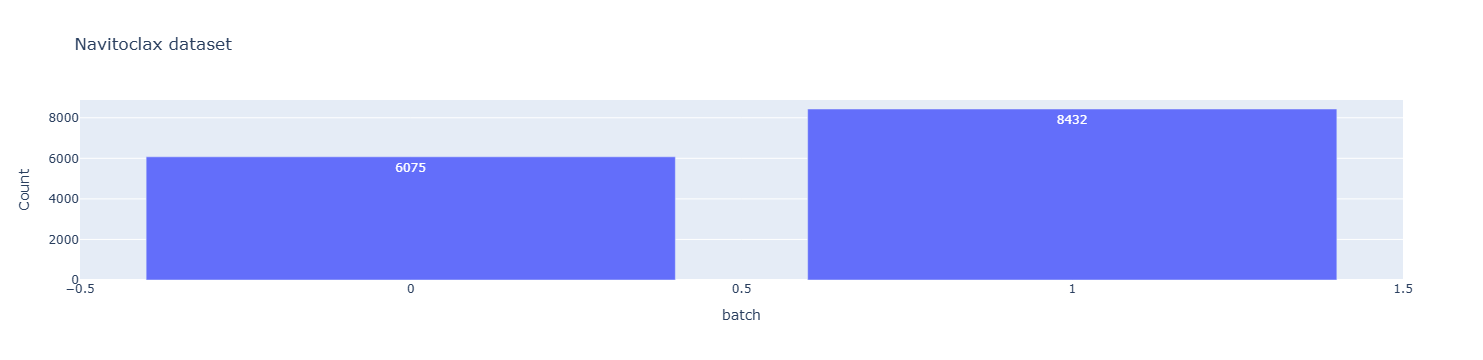

In [14]:
value_counts = dataset_merged['batch'].value_counts().reset_index()
value_counts.columns = ["batch", "Count"]

fig = px.bar(value_counts, x="batch", y="Count", text="Count", title=f"{drug} dataset")
fig.show()